# Analysis on the Test Functions

### Importing the libraries

In [1]:
from matplotlib.pyplot import *
import pickle
from Hierarchical_Approach import Inference_1D, Inference_2D

## 1D

### Importing the data

Here either the data can be imported from the noisy 1d data used in the paper (saved in file Schwefel.p), or it can be randomly generated again and used in the analysis.

In [13]:
Data1 = pickle.load( open( "Schwefel.p", "rb" ))

### Fitting the model

In [14]:
num = 200
Data_pred1 = np.zeros([num,2])
Data_pred1[:,0] = np.linspace(Data1[0,0],Data1[-1,0],200)
res1,sopt1,qopt1,fun_vec1 = Inference_1D(Data1,Data_pred1)

0
1
2
3
4
5
6
7
8
9
10
11


### Plotting the results

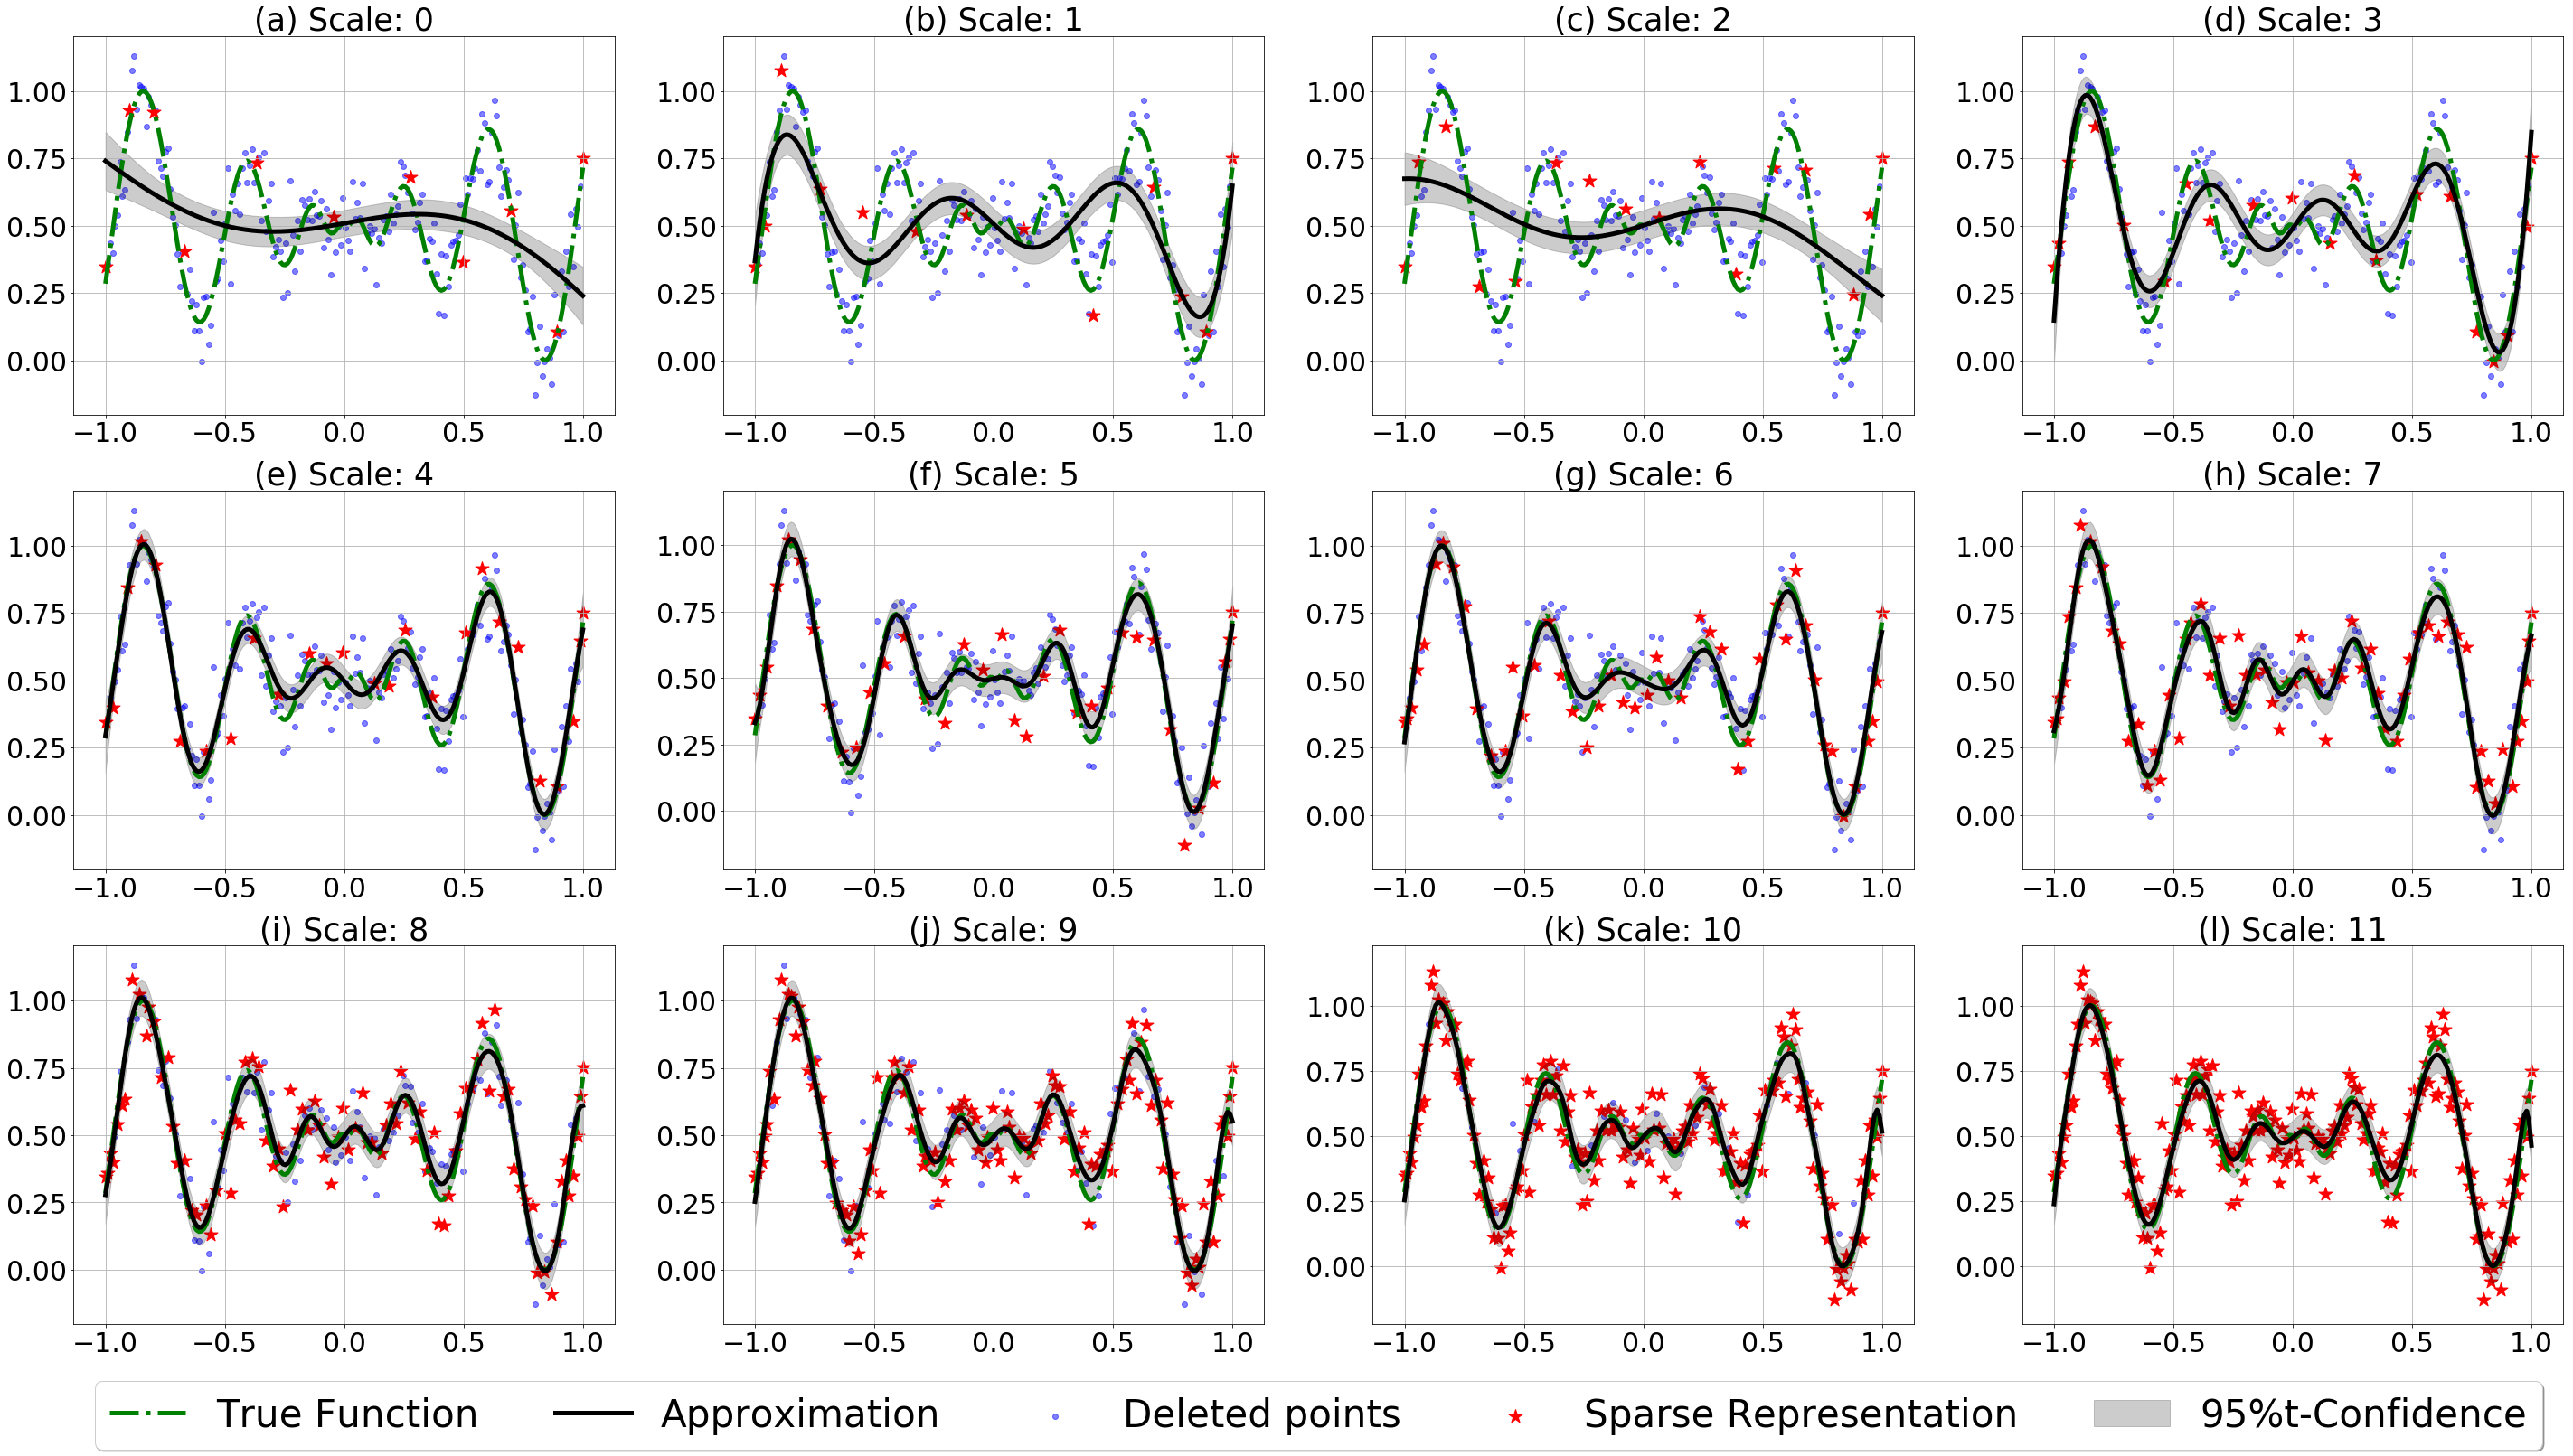

In [16]:
fig1 = figure(figsize=(45,20))
tt = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)']
for i in range(len(res1)):
    #ax = subplot2grid((2,6),(i%2,int(i/2)))
    ax = subplot2grid((3,4),(int(i/4),i%4))
    ## Plotting the results
    ax.plot(Data1[:,0],Data1[:,2],color = 'g',lw = 5,alpha = 1,linestyle = '-.',label = 'True Function')
    ax.scatter(Data1[:,0],Data1[:,3],color = 'b',alpha = 0.5, label = 'Deleted points')
    ax.scatter(sopt1[i][:,0],sopt1[i][:,2],color = 'r',s = 250,marker = '*',label = 'Sparse Representation')
    ax.plot(Data_pred1[:,0],res1[i][0],lw = 5,color = 'k', label = 'Approximation')
    ax.fill_between(Data_pred1[:,0].flatten(),res1[i][0].flatten()-res1[i][1],res1[i][0].flatten()+res1[i][1], alpha = 0.2,color = 'k', label = '95%t-Confidence')
    ax.set_title(tt[i]+' Scale: '+str(i),size = 35)
    #ax.legend(fontsize=17)
    grid(True)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
#ax.legend(bbox_to_anchor=(0.5, 0.5), prop={'size': 10})
ax.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=5,fontsize=42)
subplots_adjust(left=0.09, bottom = 0, right = 0.94, top = 0.99,wspace = 0.2,hspace = 0.2)   # determines the padding on the graph
fig1.savefig("img3.png", bbox_inches='tight')
show()

## 2D

### Importing data

In [2]:
Data2 = pickle.load( open( "Bohachevsky.p", "rb" ) )

### Fitting the model

In [3]:
n = 50
x4 = np.linspace(-500,500,n)
y4 = np.linspace(-500,500,n)
Z3 = np.zeros([n,n])
Z4 = np.zeros([n,n])
Data_pred = np.zeros([n*n,2])
cx = -1
cy = 0
count = 0
for i in x4:
    cy = 0
    cx = cx+1
    for j in y4:
        Data_pred[count,0] = x4[cx]
        Data_pred[count,1] = y4[cy]
        count = count +1
        cy = cy + 1
flagx = max(max(x4),abs(min(x4)))
flagy = max(max(y4),abs(min(y4)))
Datapred2 = []
for u in Data_pred:
    Datapred2.append([u[0]/flagx,u[1]/flagy])
Datapred2 = np.array(Datapred2)

res2,sopt2,qoptx,qopty,fun_vec2 = Inference_2D(Data2,Datapred2,confidence = 0.95)

0
1
2
3
4
5
6
7
8
9


### Plotting the results

In [7]:
from mpl_toolkits.mplot3d import Axes3D

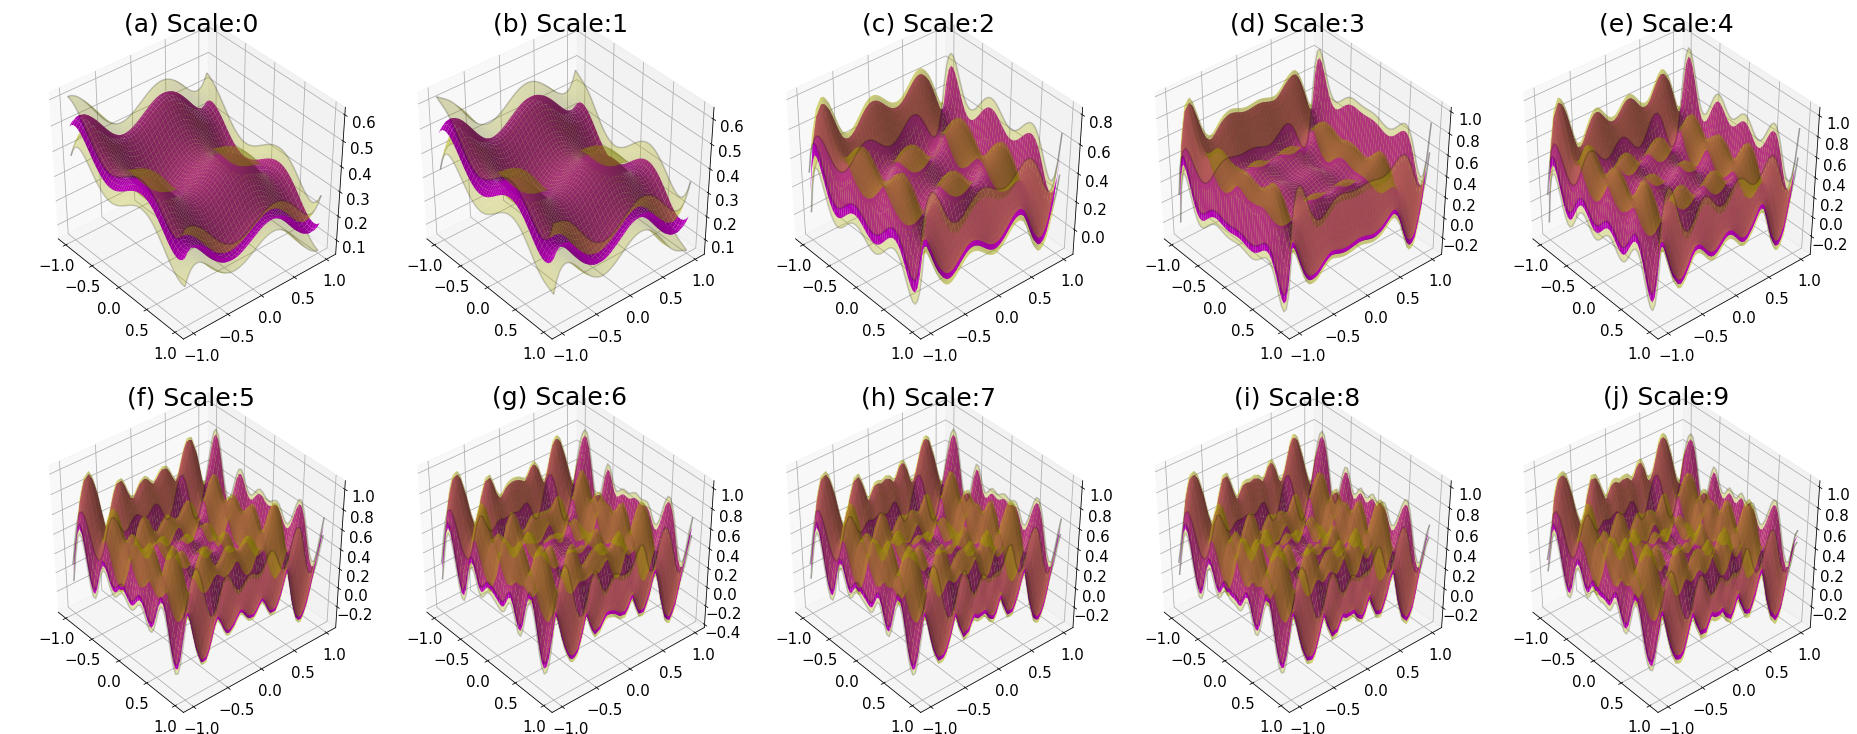

In [11]:
### Plotting the results
X,Y = np.meshgrid(x4/flagx,y4/flagy)
fig = figure(figsize=(30,10))
tt = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)']
for i in range(len(res2)):
    ax = fig.add_subplot(2, 5, i+1, projection='3d') 
    count = 0
    surfplot = np.zeros([50,50])
    for i1 in range(50):
        for j1 in range(50):
            surfplot[i1,j1] = res2[i][0][count]
            count = count + 1
            
    count = 0
    surferror = np.zeros([50,50])
    for i1 in range(50):
        for j1 in range(50):
            surferror[i1,j1] = res2[i][1][count]
            count = count + 1        
            
    me1 = ax.plot_wireframe(X, Y, surfplot-surferror, rstride=50, cstride=50,color = 'k',alpha = 0.2)
    surf1 = ax.plot_surface(X, Y,surfplot-surferror, color = 'y',alpha = 0.3, label = '$\pm$95% t-confidence')
    surf2 = ax.plot_surface(X, Y,surfplot, color = 'm', label = 'Mean Prediction')
    surf3 = ax.plot_surface(X, Y,surfplot+surferror, color = 'y',alpha = 0.3)
    me2 = ax.plot_wireframe(X, Y, surfplot+surferror, rstride=50, cstride=50,color = 'k',alpha =0.2)
    blue_proxy = Rectangle((0, 0), 1, 1, fc="y",alpha = 0.3)
    red_proxy = Rectangle((0, 0), 1, 1, fc="m")
    #ax.legend([blue_proxy,red_proxy],['$\pm$95% t-confidence','Mean Prediction'],fontsize=15,loc=4)
    ax.view_init(40, -40)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='z', labelsize=15)
    ax.set_title(tt[i]+' Scale:'+str(i),size = 25)
subplots_adjust(left=0.09, bottom = 0, right = 0.94, top = 0.99,wspace = 0.02,hspace = 0.1)   # determines the padding on the graph
fig.savefig("img4.png", bbox_inches='tight')
show()

### Convergence plots

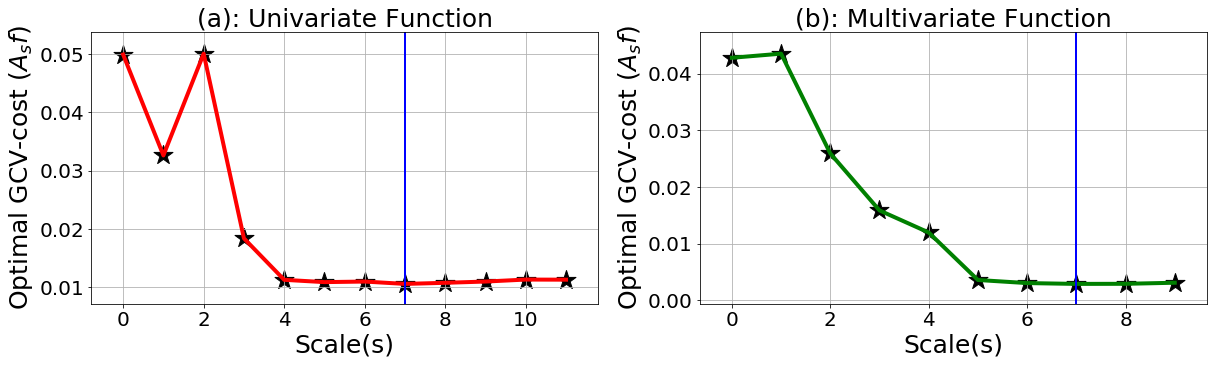

In [20]:
fig2 = figure(figsize=(20,5))
ax = subplot2grid((1,2),(0,0))
ax.plot(range(12),fun_vec1,lw = 4,color = 'r')
ax.scatter(range(12),fun_vec1, marker = '*',s=400,color = 'k')
ax.grid(True)
axvline(x = np.argmin(fun_vec1),color = 'b',lw= 2)
ax.set_title('(a): Univariate Function',size = 25)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel('Scale(s)',size=25)
ax.set_ylabel('Optimal GCV-cost ($A_sf$)',size=25)


ax = subplot2grid((1,2),(0,1))
ax.plot(range(10),fun_vec2,lw = 4,color = 'g')
ax.scatter(range(10),fun_vec2, marker = '*',s=400,color = 'k')
axvline(x = np.argmin(fun_vec2),color = 'b',lw= 2)
ax.grid(True)
ax.set_title('(b): Multivariate Function',size = 25)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel('Scale(s)',size=25)
ax.set_ylabel('Optimal GCV-cost ($A_sf$)',size=25)
fig2.savefig("img5.png", bbox_inches='tight')
show()

### Table 1

In [31]:
## Compression ratio
for i in range(12):
    print(1-sopt1[i].shape[0]/Data1.shape[0])

0.945
0.935
0.92
0.9
0.87
0.825
0.77
0.685
0.5700000000000001
0.405
0.18000000000000005
0.0


In [33]:
qopt1

[1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2]

In [36]:
np.argmin(fun_vec1)

7

### Table 2

In [38]:
## Compression ratio
for i in range(10):
    print(1-sopt2[i].shape[0]/Data2.shape[0])

0.9796
0.9712
0.9568
0.9344
0.8924
0.8188
0.6832
0.4384
0.0796
0.0


In [39]:
qoptx

[1, 1, 1, 1, 1, 2, 1, 2, 1, 1]

In [40]:
qopty

[1, 1, 1, 1, 1, 2, 1, 2, 2, 2]

In [42]:
np.argmin(fun_vec2)

7

### Table 3

In [46]:
## Getting the convergence scale
i1 = np.argmin(fun_vecr1)
i2 = np.argmin(fun_vecr2)
i3 = np.argmin(fun_vecr3)
i4 = np.argmin(fun_vecr4)
print(i1,i2,i3,i4)

10 9 1 9


In [47]:
print(1-soptr1[i1].shape[0]/Datar1.shape[0])
print(1-soptr2[i2].shape[0]/Datar2.shape[0])
print(1-soptr3[i3].shape[0]/Datar3.shape[0])
print(1-soptr4[i4].shape[0]/Datar4.shape[0])

0.0
0.21621621621621623
0.9121621621621622
0.21621621621621623


In [48]:
qoptr1[i1],qoptr2[i2],qoptr3[i3],qoptr4[i4]

(2, 1, 1, 1)